# 加载数据


In [8]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

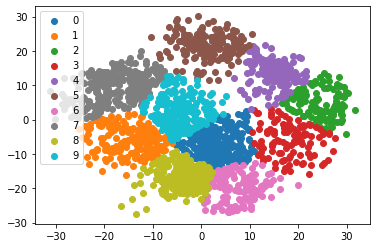

In [9]:
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)
 
#Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

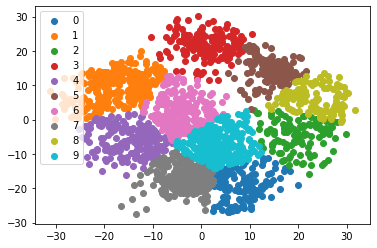

In [75]:
import pandas as pd
K = 10
N_iter = 10
cluster = {}
data = pca.fit_transform(data)

## 随机生成出初始中心点

centorid_id = np.random.permutation(data.shape[0])[:K]
centroid = {k: data[centorid_id[k], :] for k in range(K)}

for n_iter in range(N_iter):
    ## 重新分配cluster：将每个样本归类到离它最近的中心点中，结果存储为dict
    cluster = {}
    for i, x in enumerate(data):
        values = [np.sum((x - centroid[k])**2) for k in range(K)]
        cluster_id = values.index(min(values))
        cluster.setdefault(cluster_id, [i]).append(i)
    ## 重新生成中心点
    for k in range(K):
        centroid[k] = data[cluster[k], :].mean(axis=0) 
        
#Visualize the results
u_labels = np.unique(label)
for k in range(K):
    plt.scatter(data[cluster[k], 0] ,  data[cluster[k], 1] , label = k)
plt.legend()
plt.show()

In [67]:
np.array(cluster_id).shape

(2,)

In [59]:
# data.data["cluster_id"]  = cluster_id
# len(cluster_id)
cluster_id

[0,
 8,
 7,
 2,
 7,
 2,
 7,
 1,
 6,
 2,
 0,
 7,
 6,
 5,
 8,
 1,
 7,
 7,
 1,
 3,
 0,
 1,
 9,
 5,
 7,
 7,
 7,
 7,
 1,
 3,
 0,
 2,
 6,
 9,
 7,
 9,
 0,
 3,
 1,
 3,
 9,
 8,
 7,
 7,
 1,
 4,
 7,
 1,
 0,
 0,
 1,
 7,
 8,
 1,
 8,
 0,
 7,
 7,
 7,
 5,
 4,
 7,
 4,
 5,
 8,
 7,
 7,
 0,
 8,
 1,
 7,
 9,
 0,
 3,
 6,
 7,
 1,
 8,
 0,
 0,
 1,
 1,
 7,
 5,
 6,
 8,
 7,
 8,
 7,
 5,
 7,
 5,
 3,
 8,
 1,
 8,
 7,
 8,
 5,
 8,
 7,
 0,
 6,
 5,
 8,
 3,
 7,
 1,
 7,
 1,
 7,
 7,
 1,
 1,
 7,
 7,
 9,
 1,
 1,
 2,
 6,
 8,
 1,
 1,
 8,
 5,
 0,
 1,
 3,
 8,
 0,
 2,
 9,
 5,
 8,
 1,
 0,
 1,
 6,
 3,
 0,
 7,
 5,
 4,
 8,
 1,
 6,
 8,
 6,
 3,
 0,
 6,
 5,
 5,
 8,
 7,
 7,
 8,
 7,
 3,
 0,
 2,
 1,
 7,
 0,
 1,
 0,
 3,
 7,
 3,
 7,
 8,
 6,
 1,
 1,
 5,
 1,
 6,
 0,
 0,
 9,
 5,
 1,
 6,
 6,
 0,
 1,
 9,
 0,
 4,
 5,
 8,
 4,
 5,
 8,
 7,
 0,
 0,
 8,
 2,
 7,
 1,
 0,
 2,
 6,
 9,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 5,
 9,
 1,
 8,
 5,
 6,
 5,
 2,
 7,
 1,
 7,
 6,
 8,
 5,
 7,
 8,
 0,
 1,
 5,
 0,
 3,
 0,
 7,
 1,
 7,
 8,
 8,
 8,
 6,
 8,
 6,
 1,
 7,
 7,
 8,
 1,
 1,


In [47]:
# data[cluster[k], :].mean(axis=0) 
# data[cluster[k], 0].shape
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
np.random.permutation(100)

array([ 9, 57, 86, 23, 41, 25, 80,  5, 39,  0,  1, 70, 14, 50, 56, 30, 34,
       35,  4, 40, 48, 69, 53, 94, 58, 93, 36, 96, 99, 74, 88, 51, 67, 66,
       81, 85, 55, 72, 92, 42, 76, 98, 64, 83, 33,  7, 32, 78, 13, 43, 18,
       10, 62, 68,  6, 49, 44, 20, 71, 79, 54, 38, 59, 82, 52, 84, 45, 37,
       46, 97,  2, 17, 12,  8, 24, 90, 95, 60, 75, 65, 89, 29, 19, 27, 31,
       87, 91, 22, 21, 47, 63, 28, 73,  3, 15, 11, 16, 61, 26, 77])

In [15]:
?np.random.permutation

Docstring:
permutation(x)

Randomly permute a sequence, or return a permuted range.

If `x` is a multi-dimensional array, it is only shuffled along its
first index.

.. note::
    New code should use the ``permutation`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
x : int or array_like
    If `x` is an integer, randomly permute ``np.arange(x)``.
    If `x` is an array, make a copy and shuffle the elements
    randomly.

Returns
-------
out : ndarray
    Permuted sequence or array range.

See Also
--------
Generator.permutation: which should be used for new code.

Examples
--------
>>> np.random.permutation(10)
array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random

>>> np.random.permutation([1, 4, 9, 12, 15])
array([15,  1,  9,  4, 12]) # random

>>> arr = np.arange(9).reshape((3, 3))
>>> np.random.permutation(arr)
array([[6, 7, 8], # random
       [0, 1, 2],
       [3, 4, 5]])
Type:      builtin_function_or_method
